### Week6 exercise

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

1. Write a program to segment the boat and the people on it from the background. Follow the instruction below:
 - Use 'boat.jpg' as input.
 - Apply Otsu thresholding.
 - Draw bounding box to identify the region where the boat and people are located.

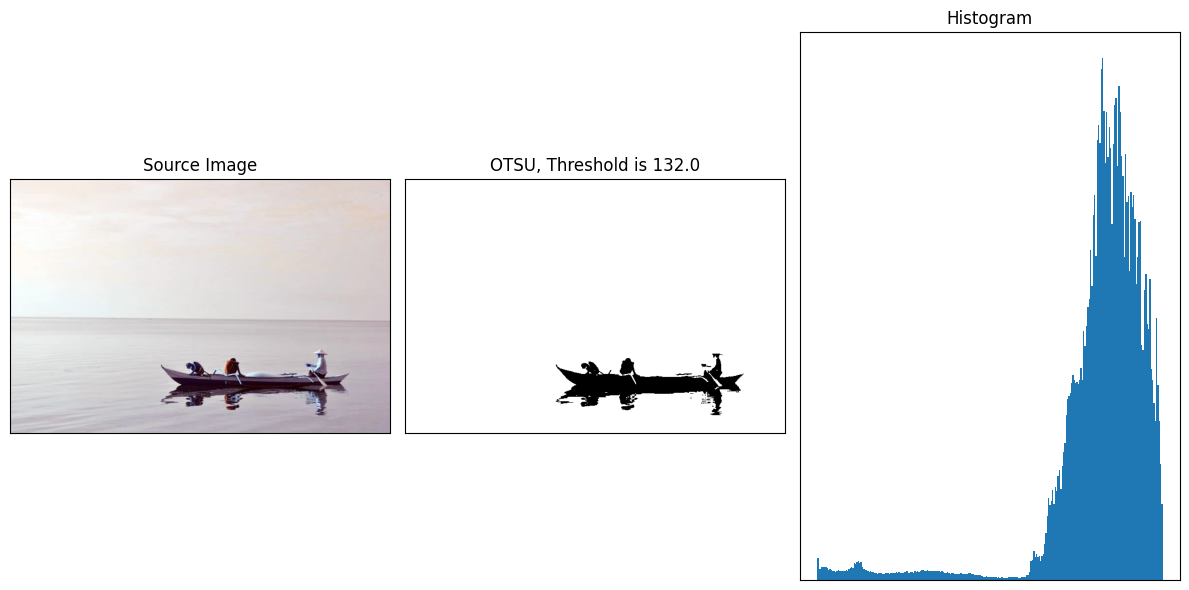

In [5]:
image = cv.imread("images/boat.jpg") 
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.imshow(image, "gray")
plt.title("Source Image")
plt.xticks([]), plt.yticks([])

plt.subplot(133)
plt.hist(image.ravel(), 256)
plt.title("Histogram")
plt.xticks([]), plt.yticks([])

otsu_t, binary_i = cv.threshold(gray, 0, 255, cv.THRESH_OTSU)

plt.subplot(132)
plt.imshow(binary_i, "gray")
plt.title("OTSU, Threshold is " + str(otsu_t))
plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

2. Write a program to visualize the effect of size of structuring element on the morphological transformation (e.g. erosion, dilation, opening, and closing).

 - Load the 'leaf.jfif' and perform thresholding to segment the leaf from the background.
 - Create a GUI containing trackbar to control the size of structuring element and display the resulting image on a window alongside the trackbar.

--

3. Apply the steps shown in exercise 4 to segment the porcelain from these images: "porcelain1.jfif" - "porcelain5.jfif".

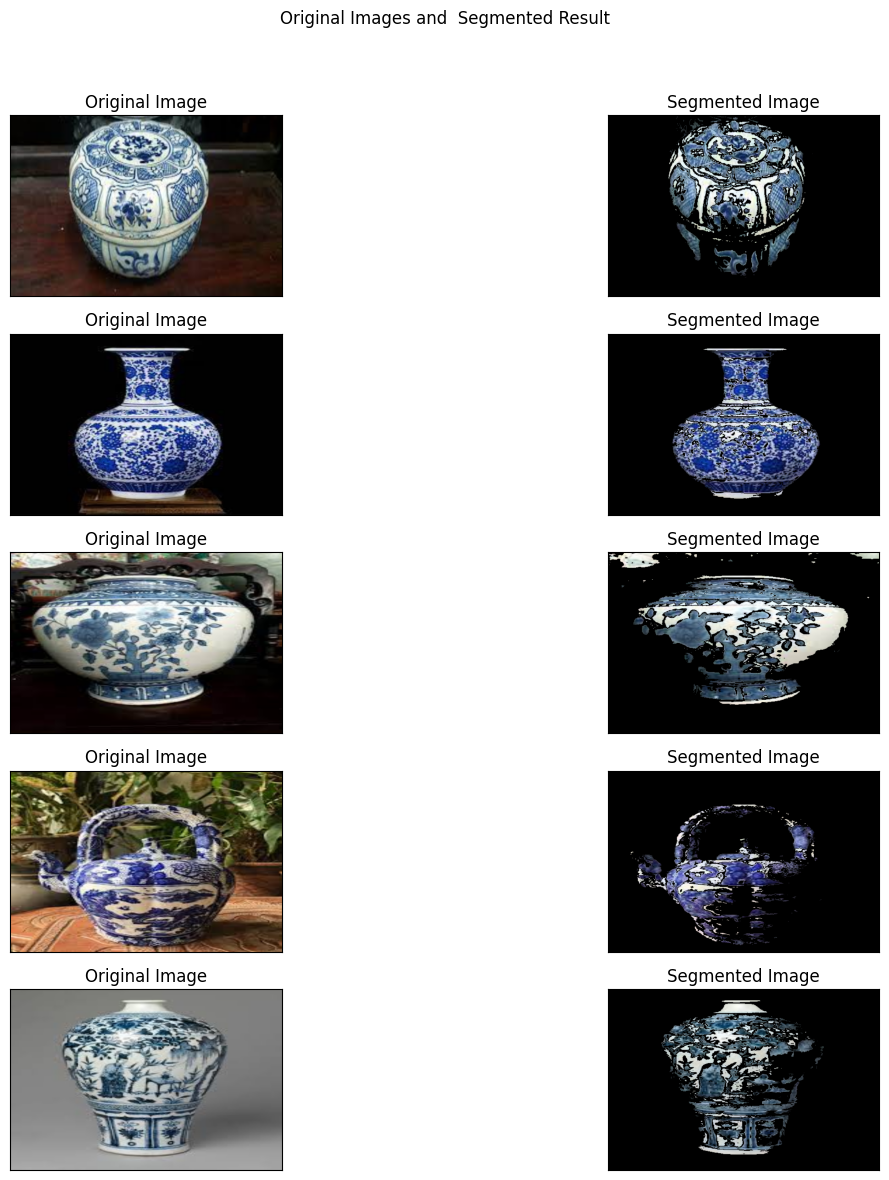

In [3]:
def segment_s(image_path):

    image = cv.imread(image_path)
    image = cv.resize(image, (600, 400))
    
    hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)
    
    lower_blue = np.array([90, 50, 50])  
    upper_blue = np.array([130, 255, 255])  
    lower_white = np.array([0, 0, 200])  
    upper_white = np.array([180, 30, 255])  
    
    blue_mask = cv.inRange(hsv, lower_blue, upper_blue)
    white_mask = cv.inRange(hsv, lower_white, upper_white)
    color_mask = cv.bitwise_or(blue_mask, white_mask)
    
    segmented_image = cv.bitwise_and(image, image, mask=color_mask)
    
    return image, segmented_image

image_paths = ["images/color_space/porcelain1.jfif",
               "images/color_space/porcelain2.jfif",
               "images/color_space/porcelain3.jfif",
               "images/color_space/porcelain4.jfif",
               "images/color_space/porcelain5.jfif"]

plt.figure(figsize=(15, 12))

for i, image_path in enumerate(image_paths):
    original, segmented = segment_s(image_path)
    
    plt.subplot(5, 2, i*2 + 1)
    plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.xticks([]), plt.yticks([])
    
    plt.subplot(5, 2, i*2 + 2)
    plt.imshow(cv.cvtColor(segmented, cv.COLOR_BGR2RGB))
    plt.title("Segmented Image")
    plt.xticks([]), plt.yticks([])

plt.suptitle("Original Images and  Segmented Result")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()